In [18]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [19]:
Images = [
{'File' :  0, 'TP' : 26, 'TN' :  2, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' :  3, 'TP' : 48, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' :  9, 'TP' : 45, 'TN' :  2, 'FP' : 1, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 25, 'TP' :  3, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 7, 'UNN': 0},
{'File' : 26, 'TP' : 14, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 27, 'TP' :  6, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 28, 'TP' : 14, 'TN' :  0, 'FP' : 0, 'FN': 0, 'UNP': 0, 'UNN': 0},
{'File' : 29, 'TP' : 20, 'TN' : 18, 'FP' : 1, 'FN': 0, 'UNP': 2, 'UNN': 0},
 ]

In [20]:
df = pd.DataFrame(Images)
df

,File,TP,TN,FP,FN,UNP,UNN
0,0,26,2,0,0,0,0
1,3,48,0,0,0,0,0
2,9,45,2,1,0,0,0
3,25,3,0,0,0,7,0
4,26,14,0,0,0,0,0
5,27,6,0,0,0,0,0
6,28,14,0,0,0,0,0
7,29,20,18,1,0,2,0


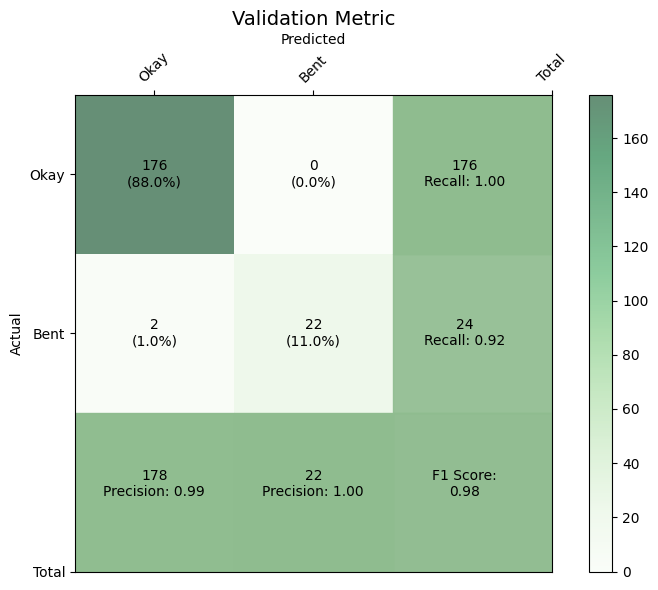

In [59]:
TP = df['TP'].sum()
TN = df['TN'].sum()
FP = df['FP'].sum()
FN = df['FN'].sum()

# Confusion matrix
confusion_matrix = np.array([[TP, FN], [FP, TN]])
grand_total = confusion_matrix.sum()
# Adjusted confusion matrix plot with extensions moved closer to the plot

# Calculate recall, precision, F1 scores for each class
row_totals = confusion_matrix.sum(axis=1)
col_totals = confusion_matrix.sum(axis=0)
recall = np.diag(confusion_matrix) / row_totals
precision = np.diag(confusion_matrix) / col_totals
f1_score = 2 * (recall * precision) / (recall + precision)
f1_score = np.nan_to_num(f1_score)  # Replace NaN with 0 for clarity

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the main confusion matrix values
cax = ax.imshow(confusion_matrix, cmap="Greens", alpha=0.6)
plt.colorbar(cax)

# Annotate the matrix
for (i, j), val in np.ndenumerate(confusion_matrix):
    percentage = val / grand_total * 100
    ax.text(j, i, f"{val}\n({percentage:.1f}%)", ha="center", va="center", fontsize=10)


R = 1.5
L = 0.5
W = 1.0
# Color the background squares dynamically based on metric values
for i, total in enumerate(row_totals):
    alpha = recall[i]  # Red to green gradient
    ax.add_patch(plt.Rectangle((R, i - L), W, 1, color='darkseagreen', alpha=alpha))
    ax.text(
        1.95, 
        i, 
        f"{total}\nRecall: {recall[i]:.2f}", 
        ha="center", 
        va="center", 
        fontsize=10, 
        color="black"
    )

for j, total in enumerate(col_totals):
    alpha = precision[j]  # Red to green gradient
    ax.add_patch(plt.Rectangle((j - L, R), 1, W, color='darkseagreen', alpha=alpha))
    ax.text(
        j, 
        1.95, 
        f"{total}\nPrecision: {precision[j]:.2f}", 
        ha="center", 
        va="center", 
        fontsize=10, 
        color="black"
    )

# F1 score color
alpha = np.mean(f1_score)  # Red to green gradient
ax.add_patch(plt.Rectangle((R, R), W, W, color='darkseagreen', alpha=alpha))
ax.text(
    1.95, 
    1.95, 
    f"F1 Score:\n{np.mean(f1_score):.2f}", 
    ha="center", 
    va="center", 
    fontsize=10, 
    color="black"
)

class_labels = ['Okay', 'Bent']
# Ticks and labels
ax.set_xticks([0, 1, 2.5])
ax.set_yticks([0, 1, 2.5])
ax.set_xticklabels(class_labels + ["Total"], rotation=45)
ax.set_yticklabels(class_labels + ["Total"])
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Metric", fontsize=14)

plt.tight_layout()
plt.show()